# HW02-06-Kenar Neshast
## Parimah Safarian 96109628

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
#a function to find the smallest value amoung 3 numbers
def biggest(a, b):
    if a >= b:
        return a
    else:
        return b

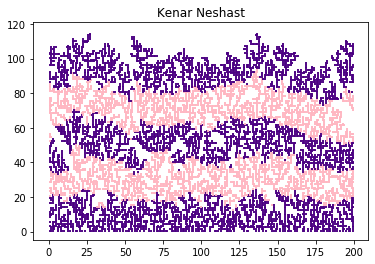

In [23]:
# Kenarneshast for x particles in an array of size L
x = 10000
L = 200
line     = np.zeros(L) 
T     = np.arange(x)

w     = np.zeros(x)

color = np.array(['indigo', 'lightpink'])

x = np.array([])
y = np.array([])

for t in T:
    #Kenar neshast
    i = int(random.random() * L)
    
    if line[i] >= line[(i+1)%L] and line[i] >= line[(L+i-1)%L]:
        line[i] += 1
    else:
        line[i] = biggest(line[(i+1)%L], line[(L+i-1)%L])
    
    #this is the way i want to plot it!
    x = np.append(x, int(i))
    y = np.append(y, int(line[i]))
        
        
#print(x)
j = k = 0
for t in T:
    if t%2000 == 0:
        plt.scatter(x[j*2000 : (j+1)*2000], y[j*2000 : (j+1)*2000] , marker = 's' , s = 1, color = color[k])
        j += 1
        k = (k+1)%2
        
plt.title("Kenar Neshast")
plt.savefig('KenarNesh.png')
plt.show()  

In [3]:
def Kenarneshast(x, L):
    line = np.zeros(L) 
    T    = np.arange(x)
    m    = int(np.floor(np.log2(x))) + 1
    w    = np.zeros(m)

    for t in T:
        #Kenar neshast
        i = int(random.random() * L)

        if line[i] >= line[(i+1)%L] and line[i] >= line[(L+i-1)%L]:
            line[i] += 1
        else:
            line[i] = biggest(line[(i+1)%L], line[(L+i-1)%L])
        
        if np.log2(t)%1 == 0:
            w[int(np.log2(t))] = np.std(line)
    return w

In [31]:
%%time
N = 20
x = 1000000
L = 200
m = int(np.floor(np.log2(x)))+1
ws = np.zeros((N, m))
for n in range(N):
    ws[n] = Kenarneshast(x, L)

w_av = np.zeros(m)
for t in range(m):
    w_av[t] = np.mean(ws[:, t]) 
    

C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


Wall time: 3min 16s


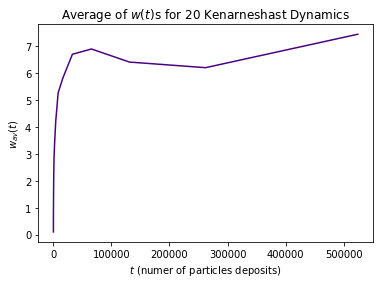

In [41]:
plt.plot(2 ** np.arange(m), w_av, c = 'indigo')
plt.title("Average of $w(t)$s for 20 Kenarneshast Dynamics")
plt.ylabel("$w_{av}(t)$")
plt.xlabel("$t$ (numer of particles deposits)")
plt.savefig('wavk.png')

In [38]:
#finding beta

beta = np.polyfit(np.log10(2 ** np.arange(m)[0:13]), np.log10(w_av[0:13]),1)
print("\u03B2 =", np.round(beta[0], 4))
print(beta)

β = 0.4859
[ 0.48589603 -1.07001467]


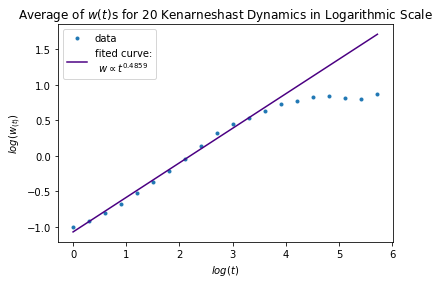

In [42]:
plt.plot(np.log10(2 ** np.arange(m)), np.log10(w_av), '.', label = 'data')
plt.title("Average of $w(t)$s for 20 Kenarneshast Dynamics in Logarithmic Scale")
plt.ylabel("$log(w_{(t)})$")
plt.xlabel("$log(t)$")
plt.plot(np.log10(2 ** np.arange(m)), beta[0] * np.log10(2 ** np.arange(m)) + beta[1], c = 'indigo', label = 'fited curve:\n $w \propto t^{0.4859}$')
plt.legend()
plt.savefig('betak.png')

#### Finding $z$ as:
$t_s \propto L^z$

C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:16: RuntimeWa

Wall time: 14.2 s


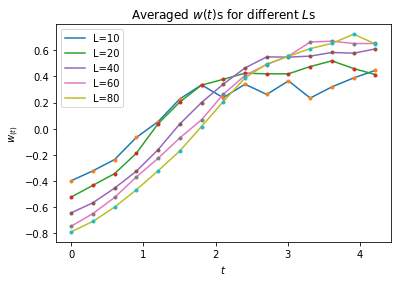

In [11]:
%%time
N = 10
x = 10000 * 3

L_mat = [10, 20, 40, 60, 80]
for L in L_mat:
    m = int(np.floor(np.log2(x)))+1
    ws = np.zeros((N, m))
    for n in range(N):
        ws[n] = Kenarneshast(x, L)

    w_av = np.zeros(m)
    for t in range(m):
        w_av[t] = np.mean(ws[:, t]) 

    plt.plot(np.log10(2 ** np.arange(m)), np.log10(w_av), label = 'L={}'.format(L))
    plt.plot(np.log10(2 ** np.arange(m)), np.log10(w_av), '.')

plt.title("Averaged $w(t)$s for different $L$s")
plt.ylabel("$w_{(t)}$")
plt.xlabel("$t$")
plt.legend()
plt.savefig("save.png")

In [5]:
N = 10
x = 10000 * 3
m = int(np.floor(np.log2(x)))+1

print(2 ** np.arange(m))
L_mat = [10, 20, 40, 60, 80]
for L in L_mat:
    m = int(np.floor(np.log2(x)))+1
    ws = np.zeros((N, m))
    for n in range(N):
        ws[n] = Kenarneshast(x, L)

    w_av = np.zeros(m)
    for t in range(m):
        w_av[t] = np.mean(ws[:, t]) 
    print(w_av)
    

[    1     2     4     8    16    32    64   128   256   512  1024  2048
  4096  8192 16384]


C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()
C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


[0.4        0.47646305 0.64249127 0.84403464 1.01915175 1.65973652
 2.25073538 2.56987911 2.40591885 2.01735645 2.68487508 1.95493597
 2.42744334 2.96162784 2.13942002]
[0.31358899 0.38105106 0.5127145  0.66889893 0.97920577 1.48886278
 2.16345237 2.63645052 2.24366503 2.39854847 3.09046612 2.83057052
 2.93988306 3.1182557  2.90243948]
[0.21794495 0.2716029  0.34441873 0.46126752 0.62962784 0.95395382
 1.47131198 2.32953948 3.23328202 3.23473747 3.38658535 3.6988556
 3.79710499 4.12713758 3.29004471]
[0.17950549 0.21794495 0.2763854  0.40772025 0.55696193 0.83153418
 1.21294253 1.87129566 2.58637957 3.26268898 3.38886517 3.49753564
 4.50000846 4.00169442 4.65763709]
[0.15612495 0.18998355 0.25147433 0.3380329  0.48581085 0.66896102
 1.01380271 1.53193126 2.31354233 2.90910451 3.57032368 3.8049836
 4.66111316 5.27589112 4.88988943]


z = 1.9275
[ 1.92754662 -0.15435445]


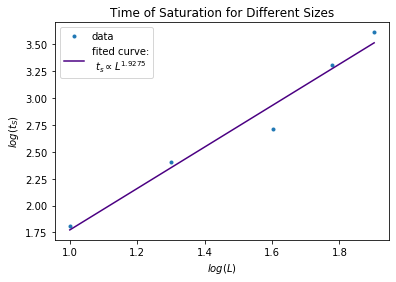

In [8]:
x = [2**6, 2**8, 2**9, 2**11, 2**12]
plt.plot(np.log10(L_mat), np.log10(x), '.', label = 'data')

z = np.polyfit(np.log10(L_mat), np.log10(x), 1)

plt.plot(np.log10(L_mat), z[0]*np.log10(L_mat)+z[1], '-', c = 'indigo', label = 'fited curve:\n $t_s \propto L^{1.9275} $')
plt.legend()
plt.title("Time of Saturation for Different Sizes")
plt.ylabel("$log(t_S)$")
plt.xlabel("$log(L)$")
print("z =", np.round(z[0], 4))
print(z)
plt.savefig("z.png")

In [10]:
alpha = z[0] * 0.4859
print("\u03B1 =", alpha)

α = 0.9365949046384845
